<h2>Insertion des données de CSV</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configurer le style de Seaborn pour des graphiques plus esthétiques
sns.set(style="whitegrid")

# Charger le dataset transformé
data = pd.read_csv("weather_data_transformed.csv")

# Convertir la colonne 'Date' en datetime si ce n'est pas déjà fait
data['Date'] = pd.to_datetime(data['Date'])

<h2>Etape 1 : Histogramme des températures</h2>

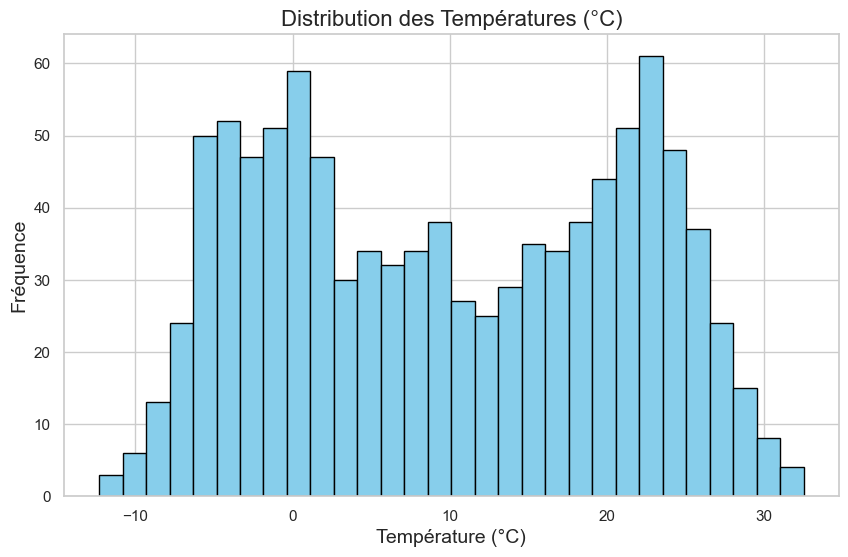

In [5]:
# Définir la taille du graphique
plt.figure(figsize=(10,6))

# Créer l'histogramme des températures
plt.hist(data['Temperature'], bins=30, color='skyblue', edgecolor='black')

# Ajouter les titres et les étiquettes
plt.title('Distribution des Températures (°C)', fontsize=16)
plt.xlabel('Température (°C)', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)

# Afficher le graphique
plt.show()

<h2>Etape 2 : Boxplot des précipitations</h2>

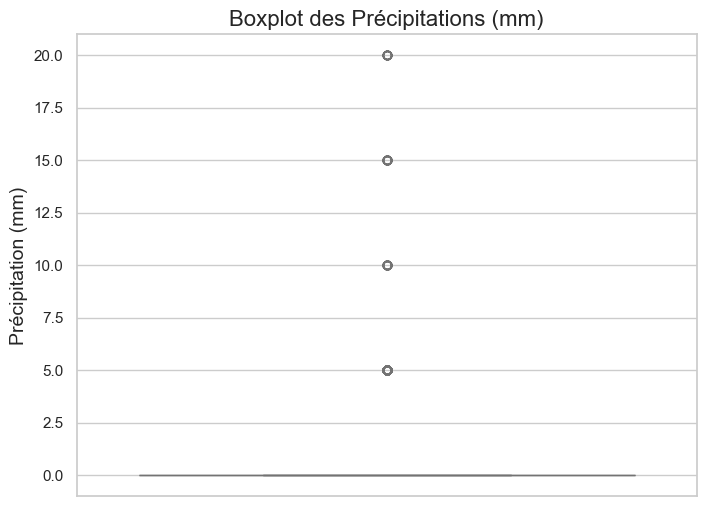

In [ ]:
# Définir la taille du graphique
plt.figure(figsize=(8,6))

# Créer le boxplot des précipitations
sns.boxplot(y='Precipitation', data=data, color='lightgreen')

# Ajouter les titres et les étiquettes
plt.title('Boxplot des Précipitations (mm)', fontsize=16)
plt.ylabel('Précipitation (mm)', fontsize=14)

# Afficher le graphique
plt.show()

<h2>Etape 3 : Relation entre température et précipitations</h2>

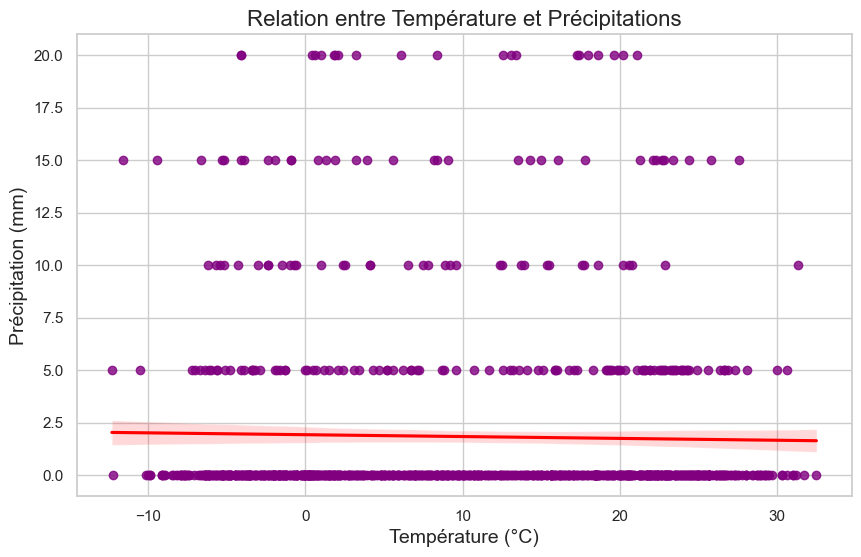

In [9]:
# Définir la taille du graphique
plt.figure(figsize=(10,6))

# Créer le scatter plot avec une ligne de régression
sns.regplot(x='Temperature', y='Precipitation', data=data, scatter=True, color='purple', line_kws={'color': 'red'})

# Ajouter les titres et les étiquettes
plt.title('Relation entre Température et Précipitations', fontsize=16)
plt.xlabel('Température (°C)', fontsize=14)
plt.ylabel('Précipitation (mm)', fontsize=14)

# Afficher le graphique
plt.show()

<h2>Etape 4 : Analyse temporelle des températures</h2>

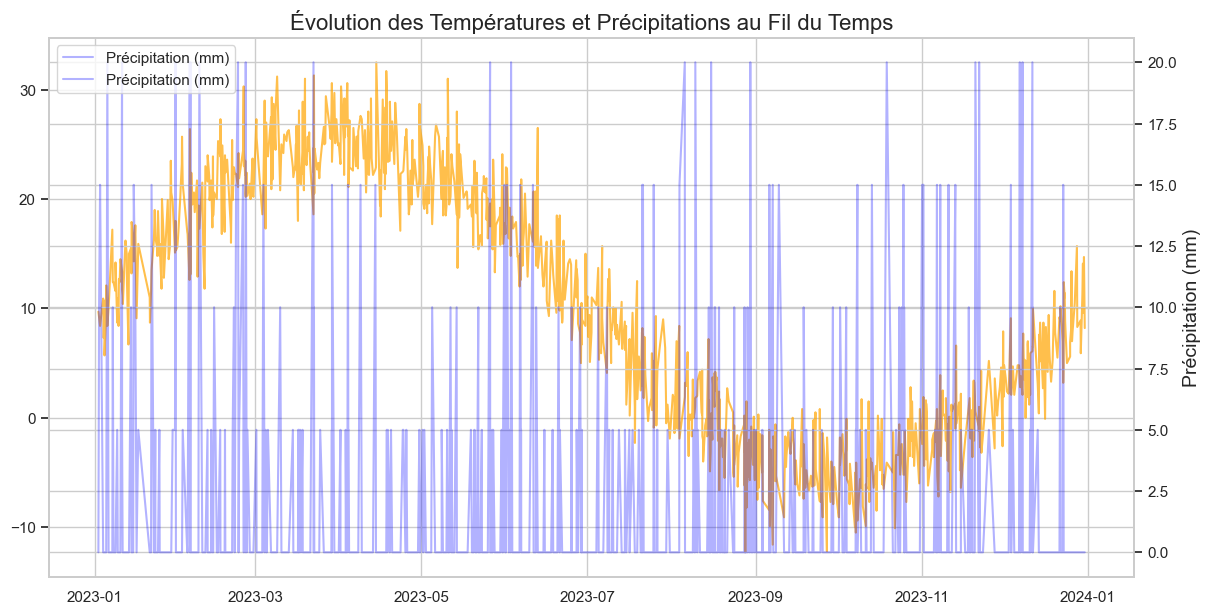

In [10]:
# Définir la taille du graphique
plt.figure(figsize=(14,7))

# Tracer la température au fil du temps
plt.plot(data['Date'], data['Temperature'], color='orange', label='Température (°C)', alpha=0.7)

# Créer un axe secondaire pour les précipitations
ax2 = plt.gca().twinx()
ax2.plot(data['Date'], data['Precipitation'], color='blue', label='Précipitation (mm)', alpha=0.3)

# Ajouter les titres et les étiquettes
plt.title('Évolution des Températures et Précipitations au Fil du Temps', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Température (°C)', fontsize=14)
ax2.set_ylabel('Précipitation (mm)', fontsize=14)

# Ajouter les légendes
lines_1, labels_1 = plt.gca().get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Améliorer la lisibilité des dates
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()


<h2>Etape 5 : Heatmap des corrélations</h2>

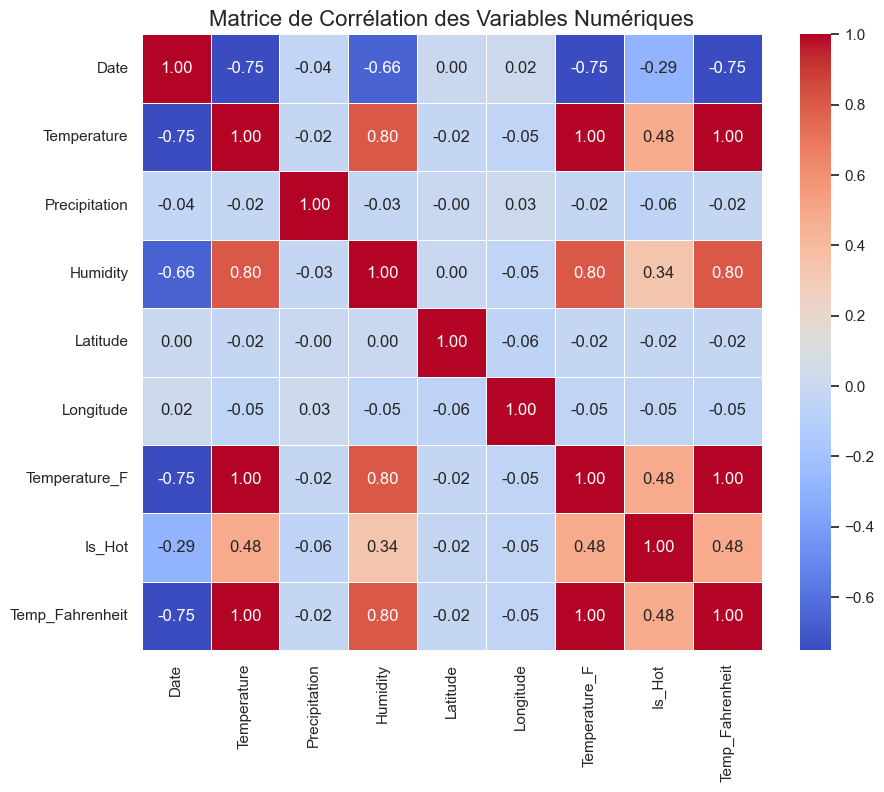

In [11]:
# Calculer la matrice de corrélation
corr_matrix = data.corr()

# Définir la taille du graphique
plt.figure(figsize=(10,8))

# Créer la heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Ajouter le titre
plt.title('Matrice de Corrélation des Variables Numériques', fontsize=16)

# Afficher le graphique
plt.show()


<h2>Etape 6 : Graphiques interactifs avec Plotly</h2>

In [12]:
# Créer un graphique interactif avec Plotly
fig = px.line(data, x='Date', y='Temperature', title='Évolution Interactive des Températures au Fil du Temps',
              labels={'Temperature': 'Température (°C)', 'Date': 'Date'},
              hover_data={'Humidity': True, 'Precipitation': True})

# Personnaliser le layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Température (°C)',
    template='plotly_dark'
)

# Afficher le graphique
fig.show()
